In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
wsb_df = pd.read_csv('wsb.csv')
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


To visualize Sale Quantity over Month using plot() method from Matplotlib use the following code

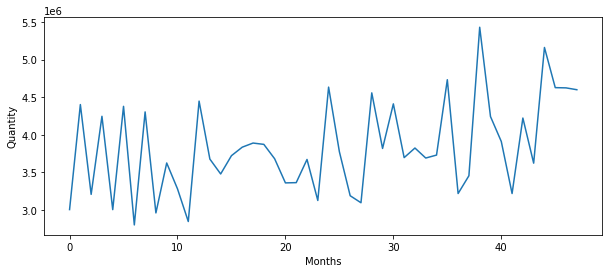

In [3]:
plt.figure(figsize=(10,4))
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.plot(wsb_df['Sale Quantity']);

In Figure 8.1, the sales quantity (vertical axis) shows a lot of fluctuations over the months. But there
seems to be an increasing trend as well.
We now print the summary of the dataset using the info() method of the DataFrame.

In [4]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


The dataset contains quantity of 100 ml bottles sold during each month for a period of 48 months, pro-
motion expenses incurred by the company, and whether the competition was on promotion (value of 1
implies that the competition was on promotion and 0 otherwise)

# Forecasting Using Moving Average

Moving average is one of the simplest forecasting techniques which forecasts the future value of a time-
series data using average (or weighted average) of the past N observations. Forecasted value for time
t +1 using the simple moving average is given by 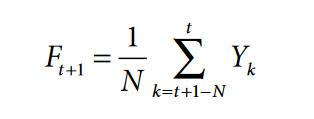
Pandas has a function rolling() which can be used with an aggregate function like mean() for calculat-
ing moving average for a time window. For example, to calculate 12 month’s moving average using last
12 months’ data starting from last month (previous period), rolling() will take a parameter window,
which is set to 12 to indicate moving average of 12-months data, and then use Pandas’ shift() function,
which takes parameter 1 to specify that the 12-months data should start from last month. shift(1) means
calculating moving average for the specified window period starting from previous observation (in this
case last month).

In [5]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window = 12).mean().shift(1)

To display values up to 2 decimal points, we can use pd.set_option and floating format %.2f.

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


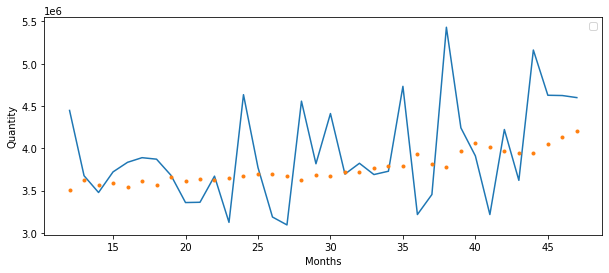

In [7]:
#We use the following code to plot actual versus the predicted values from moving average forecasting:
plt.figure(figsize=(10,4))
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.plot(wsb_df['Sale Quantity'][12:]);
plt.plot(wsb_df['mavg_12'][12:], '.');
plt.legend();

Actual versus forecasted sales quantity using moving average
there is an increasing trend in sales quantity over the months

## Calculating Forecast Accuracy

Root mean square error (RMSE) and mean absolute percentage error (MAPE) are the two most popular
accuracy measures of forecasting. We will be discussing these measures in this section.

### Mean Absolute Percentage Error

Mean absolute percentage error (MAPE) is the average of absolute percentage error. Assume that the
validation data has n observations and forecasting is carried out on these n observations. The mean
absolute percentage error is given by 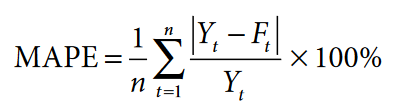
MAPE is one of the popular forecasting accuracy measures used by practitioners since it expresses the
average error in percentage terms and is easy to interpret. Since MAPE is dimensionless, it can be used
for comparing different models with varying scales.
The following custom method get_mape() takes the series of actual values and foretasted values, and
returns the MAPE.

In [8]:
import numpy as np
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual))* 100, 2) 

We invoke the above method using column values of wbd_df DataFrame. “Sale Quantity” is passed as actual
and mavg_12 is passed as predicted values. Records from the 37th month are used to calculate MAPE

In [9]:
get_mape( wsb_df['Sale Quantity'][36:].values,wsb_df['mavg_12'][36:].values)

14.04

The MAPE in this case is 14.04. So, forecasting using moving average gives us a MAPE of 14.04%.

### Root Mean Square Error

Root mean square error (RMSE) is the square root of average of squared error calculated over the valida-
tion dataset, and is the standard deviation of the errors for unbiased estimator. RMSE is given by 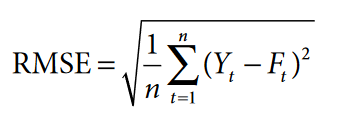 
Lower RMSE implies better prediction. However, it depends on the scale of the time-series data. MSE
(Mean Squared Error) can be calculated using mean_squared_error() method in sklearn.metrics. We can
pass MSE value to np.sqrt() to calculate RMSE.

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,wsb_df['mavg_12'][36:].values))

734725.8359239782

The RMSE in this case is 734725.83. So, the RMSE of the moving average model indicates that the
prediction by the models has a standard deviation of 734725.83

### Exponential Smoothing

One of the drawbacks of the simple moving average technique is that it gives equal weight to all the pre-
vious observations used in forecasting the future value. Exponential smoothing technique (also known
as simple exponential smoothing; SES) assigns differential weights to past observations.
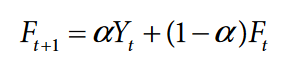
where α is called the smoothing constant, and its value lies between 0 and 1. Ft+1 is the forecasted value
at time t + 1 using actual value Yt at time t and forecasted values Ft of time t. But the model applies dif-
ferential weights to both the inputs using smoothing constant α.
The ewm() method in Pandas provides the features for computing the exponential moving average
taking alpha as a parameter.

In [11]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()

Set the floating point formatting up to 2 decimal points.

In [12]:
pd.options.display.float_format = '{:.2f}'.format

Use the following code to display the records from the 37th month

In [13]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


Now calculate MAPE of the model using records from 37th month.

In [14]:
get_mape(wsb_df[['Sale Quantity']][36:].values,wsb_df[['ewm']][36:].values)

11.15

So, forecasting using exponential smoothing has about 11.15% error (MAPE) from the actual values. It
is an improvement compared to the simple moving average model. Let us plot the output to view the dif-
ference between the forecasted and actual sales quantity using exponential moving average.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


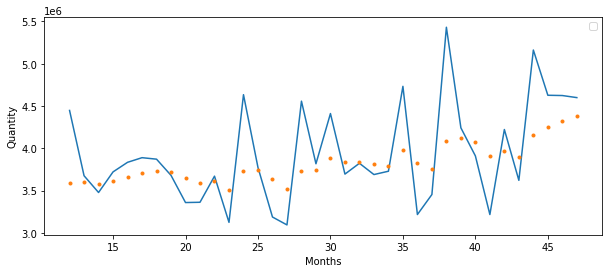

In [15]:
plt.figure( figsize=(10,4))
plt.xlabel( 'Months' )
plt.ylabel( 'Quantity' )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['ewm'][12:], '.' );
plt.legend();

prediction by exponential moving average is shown by the dotted line and shows an
increasing trend over the months. Moving average and simple exponential smoothing (SES) assume a
fairly steady time-series data with no significant trend, seasonal or cyclical components, that is, the data
is stationary. However, many dataset will have trend and seasonality.

# DECOMPOSING TIME SERIES

The time-series data can be modelled as addition or product of trend, seasonality, cyclical, and irregular
components. The additive time-series model is given by 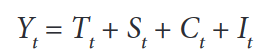
The additive models assume that the seasonal and cyclical components are independent of the trend
component. Additive models are not very common, since in many cases the seasonal component may
not be independent of the trend.
The multiplicative time-series model is given by 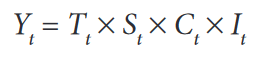
Multiplicative models are more common and are a better fit for many datasets. For example, the season-
ality effect on sales during festival times like Diwali does not result in constant increase in sales over the
years. For example, the increase in sales of cars during festival season is not just 100 units every year. The
seasonality effect has a multiplicative effect on sales based on the trend over the years like 10% additional
units based on the trend in the current year. So, in many cases the seasonality effect is multiplied with
the trend and not just added as in additive model.
In many cases, while building a forecasting model, only trend and seasonality components are
used. To estimate the cyclical component, we will need a large dataset. For example, typical period of
business cycles is about 58 months as per Investopedia (Anon, 2018). So, to understand the effect of
cyclic component we will need observations spanning more than 10 years. Most of the times, data for
such a long duration is not available.

For decomposing a time-series data, we can leverage the following libraries:
1. statsmodel.tsa provides various features for time-series analysis.
2. seasonal_decompose() in statsmodel.tsa.seasonal decomposes a time series into trend, seasonal,
and residuals. It takes frequency parameters; for example, the frequency is 12 for monthly data.
The plot() function will render the trend, seasonal, and residuals, as shown in the following code:

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:
ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']),model='multiplicative',period=12)


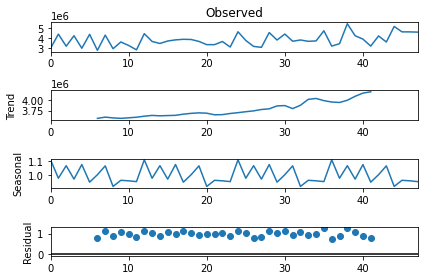

In [18]:
## Plotting the deocomposed time series components
ts_plot = ts_decompose.plot()

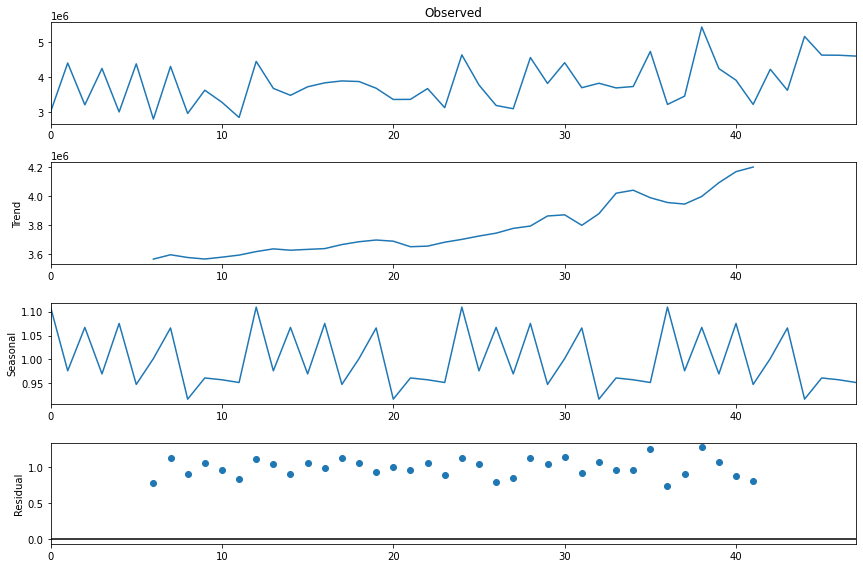

In [19]:
plt.rcParams['figure.figsize'] = (12, 8) 
fig = ts_decompose.plot()

To capture the seasonal and trend components after time-series decomposition we use the following
code. The information can be read from two variables seasonal and trend in ts_decompose.

In [20]:
wsb_df['seasonal'] = ts_decompose.seasonal
wsb_df['trend'] = ts_decompose.trend

# AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE MODELS

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for
forecasting. AR and MA models are combined to create models such as auto-regressive moving aver-
age (ARMA) and auto-regressive integrated moving average (ARIMA) models. The initial ARMA and
ARIMA models were developed by Box and Jenkins in 1970 (Box and Jenkins, 1970). ARMA models are
basically regression models; auto-regression simply means regression of a variable on itself measured at
different time periods. We will discuss each component in the subsequent sections.

## Auto-Regressive (AR) Models

Auto-regression is a regression of a variable on itself measured at different time points. Auto-regressive
model with lag 1, AR (1), is given by 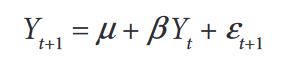
Equation (8.5) can be generalized to include p lags on the right-hand side and is called a AR (p) model.
Equation (8.5) can be re-written as 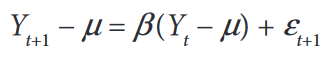
where et+1 is a sequence of uncorrelated residuals assumed to follow the normal distribution with zero
mean and constant standard deviation. (Yt − m) can be interpreted as a deviation from mean value m ;
it is known as mean centered series.
One of the important tasks in using the AR model in forecasting is model identification,
which is, identifying the value of p (the number of lags). One of the standard approaches used for model
identification is using auto-correlation function (ACF) and partial auto-correlation function (PACF).

### ACF

Auto-correlation of lag k is the correlation between Yt and Yt–k measured at different k values (e.g., Yt
and Yt−1 or Yt and Yt−2). A plot of auto-correlation for different values of k is called an auto-correlation
function (ACF) or correlogram.
statsmodels.graphics.tsaplots.plot_acf plots the autocorrelation plot.

### PACF

Partial auto-correlation of lag k is the correlation between Yt and Yt−k when the influence of all inter-
mediate values (Yt−1, Yt−2, ..., Yt−k+1) is removed (partial out) from both Yt and Yt−k. A plot of partial
auto-correlation for different values of k is called partial auto-correlation function (PACF).
statsmodels.graphics.tsaplots.plot_pacf plots the partial auto-correlation plot.
For applying the AR model, we will use another dataset described in the following example.

### Example Aircraft Spare Parts

Monthly demand for avionic system spares used in Vimana 007 aircraft is provided in
vimana.csv. Build an ARMA model based on the first 30 months of data and forecast the
demand for spares for months 31 to 37. Comment on the accuracy of the forecast

Solution:
We first read the dataset from viman.csv onto a DataFrame and print the first 5 records.

In [21]:
vimana_df = pd.read_csv('vimana.csv')
vimana_df.head(5)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [22]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


Draw the ACF plot to show auto-correlation upto lag of 20 using the following code:

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

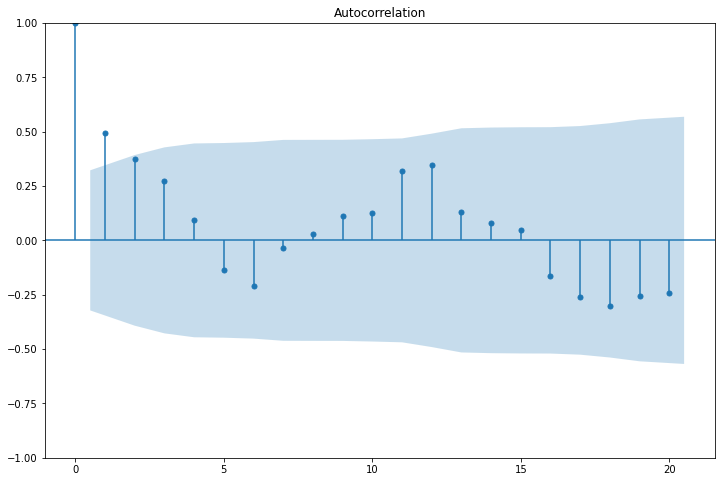

In [24]:
# Show autocorrelation upto lag 20
acf_plot = plot_acf( vimana_df.demand,lags=20)

the shaded area represents the upper and lower bounds for critical values, where the null
hypothesis cannot be rejected (auto-correlation value is 0). So, as can be seen from Figure 8.5, null
hypothesis is rejected only for lag = 1 (i e., auto-correlation is statistically significant for lag 1).
We draw the PACF plot with lag up to 20

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


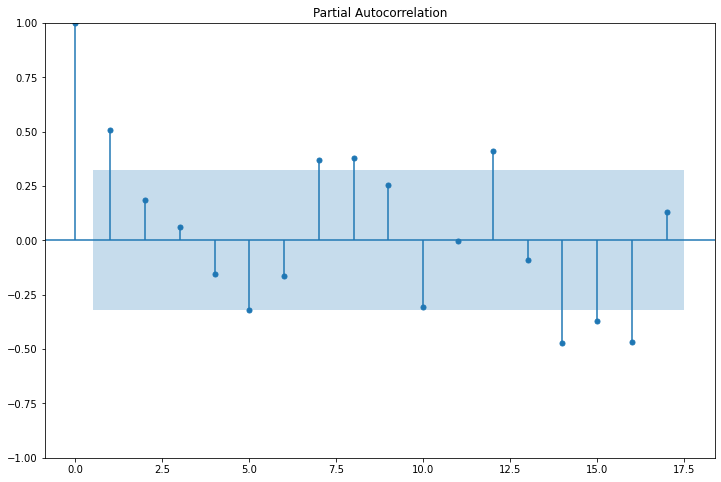

In [25]:
pacf_plot = plot_pacf( vimana_df.demand,lags=17 )

the shaded area represents the upper and lower bounds for critical values, where the null
hypothesis cannot be rejected. So, for lag = 1 the partial auto-correlation is significant.
To select the appropriate p in the AR model, the following thumb rule can be used:
1. The partial auto-correlation is significant for first p-values (first p lags) and cuts off to zero.
2. The ACF decreases exponentially. (Signs of stationarity)
In the above case, based on ACF and PACF plots, AR with lag 1, AR(1), can be used.

### Building AR Model

Machine Learning using Python276
8.5.1.3 Building AR Model
The statsmodels.tsa.arima_model.ARIMA can be used to build AR model. It takes the following two
parameters:
1. endog: list of values – It is the endogenous variable of the time series.
2. order: The (p, d, q) – ARIMA model parameters. Order of AR is given by the value p, the order
of integration is d, and the order of MA is given by q.
We will set d and q to 0 and use p = 1 for AR(1) model, and we will use only 30 months of data for building
the model and forecast the next six months for measuring accuracy.
Building the model and printing the accuracy.

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model = sm.tsa.arima.ARIMA(vimana_df.demand[0:30], order=(1,0,0))
ar_model = model.fit()

In [28]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Sat, 01 Apr 2023   AIC                            371.530
Time:                        18:37:43   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
print('Parameters: ', ar_model.params)


Parameters:  const      513.44
ar.L1        0.47
sigma2   11362.04
dtype: float64


The model summary indicates the AR with lag 1 is significant variables in the model. The corresponding
p-value is less than 0.05 (0.009).

### Forecast and Measure Accuracy

Forecast the demand for the months 31 to 37. The index will be (month index – 1

In [30]:
forecast_31_37 = ar_model.predict(30, 36)
forecast_31_37

30   480.15
31   497.71
32   506.01
33   509.93
34   511.78
35   512.66
36   513.07
Name: predicted_mean, dtype: float64

In [31]:
get_mape( vimana_df.demand[30:],forecast_31_37 )

19.12

## Moving Average (MA) Processes

MA processes are regression models in which the past residuals are used for forecasting future values of
the time-series data.
A moving average process of lag 1 can be written as 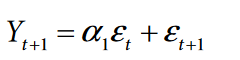
The model in Eq. (8.7) can be generalized to q lags. The value of q (number of lags) in a moving average
process can be identified using the following rules (Yaffee and McGee, 2000):
1. Auto-correlation value is significant for first q lags and cuts off to zero.
2. The PACF decreases exponentially.
We can build an MA model with q value as 1 and print the model summary

In [32]:
arima = sm.tsa.arima.ARIMA(vimana_df.demand[0:30], order=(0,0,1))
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Sat, 01 Apr 2023   AIC                            374.595
Time:                        18:37:43   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.484      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As per the model summary, moving average with lag 1 is statistically significant as the corresponding
p-value is less than 0.05. Use the following code to measure the accuracy with the forecasted values of
six periods.

In [33]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape(vimana_df.demand[30:],forecast_31_37 )

17.78

## ARMA Model

Auto-regressive moving average (ARMA) is a combination auto-regressive and moving average process.
ARMA(p, q) process combines AR(p) and MA(q) processes.
The values of p and q in an ARMA process can be identified using the following thumb rules:
1. Auto-correlation values are significant for first q values (first q lags) and cuts off to zero.
2. Partial auto-correlation values are significant for first p values and cuts off to zero.
Based on the ACF and PACF plots in the previous section, we will develop ARMA(1, 1) model using the
following codes:

In [34]:
arima = sm.tsa.arima.ARIMA(vimana_df.demand[0:30], order=(1,0,1))
arma_model = arima.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.846
Date:                Sat, 01 Apr 2023   AIC                            371.692
Time:                        18:37:43   BIC                            377.296
Sample:                             0   HQIC                           373.485
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3844     59.146      8.595      0.000     392.460     624.308
ar.L1          0.7421      0.316      2.348      0.019       0.123       1.362
ma.L1         -0.3395      0.539     -0.629      0.529      -1.397       0.718
sigma2      1.065e+04   3040.079      3.505      0.000    4696.417    1.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.72   Prob(JB):                         0.29
Heteroskedasticity (H):               3.07   Skew:                             0.67
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape(vimana_df.demand[30:],forecast_31_37 )

20.27

The MAPE of the MA model with lag 1 is 20.27. Since MA lag is not significant, we will use AR(1) model
[or MA(1) model]

## ARIMA Model

ARMA models can be used only when the time-series data is stationary. ARIMA models are used when
the time-series data is non-stationary. Time-series data is called stationary if the mean, variance, and
covariance are constant over time. ARIMA model was proposed by Box and Jenkins (1970) and thus
is also known as Box−Jenkins methodology. ARIMA has the following three components and is repre-
sented as ARIMA (p, d, q):
1. AR component with p lags AR(p).
2. Integration component (d).
3. MA with q lags, MA(q).
The main objective of the integration component is to convert a non-stationary time-series process to a
stationary process so that the AR and MA processes can be used for forecasting. When the data is non-
stationary, the ACF will not cut-off to zero quickly; rather ACF may show a very slow decline.

### What is Stationary Data?

Time-series data should satisfy the following conditions to be stationary:
1. The mean values of Yt at different values of t are constant.
2. The variances of Yt at different time periods are constant (Homoscedasticity).
3. The covariance of Yt and Yt−k for different lags depend only on k and not on time t.
We will use dataset provided in store.xls (described in Example 8.2) for performing the stationary test
and developing ARIMA model.

Daily demand for a product in a store for the past 115 days is provided in store.xls. Develop
an appropriate ARIMA model that can be used for forecasting demand for Omelette.
Solution: The data is available in excel file and read into DataFrame using read_excel api

In [36]:
store_df = pd.read_excel('store.xls')

In [37]:
store_df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [38]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


The dataset contains 115 days of demand per day data. We can convert the column into
DateTime index, which is a default input to time-series models. Creating a DataTime index
will make sure that the data is ordered by date or time

In [39]:
store_df.set_index(pd.to_datetime(store_df.Date),inplace=True)
store_df.drop('Date', axis = 1, inplace = True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


Finally, plot the demand against the date using plot() method in matplotlib

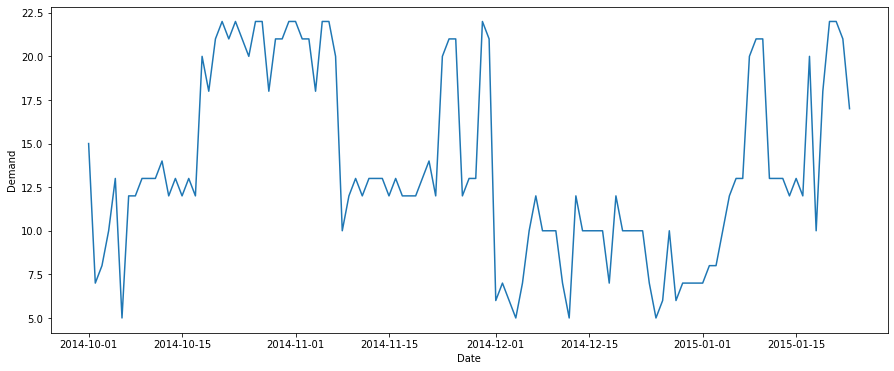

In [40]:
plt.figure( figsize=(15,6))
plt.xlabel( 'Date' )
plt.ylabel( 'Demand' )
plt.plot( store_df.demand );

Figure 8.7 indicates the trend of demand for omelette over dates. It is not very apparent from
the trend if the series is stationary or not.
Now we will draw the ACF plot to verify stationarity of the time series

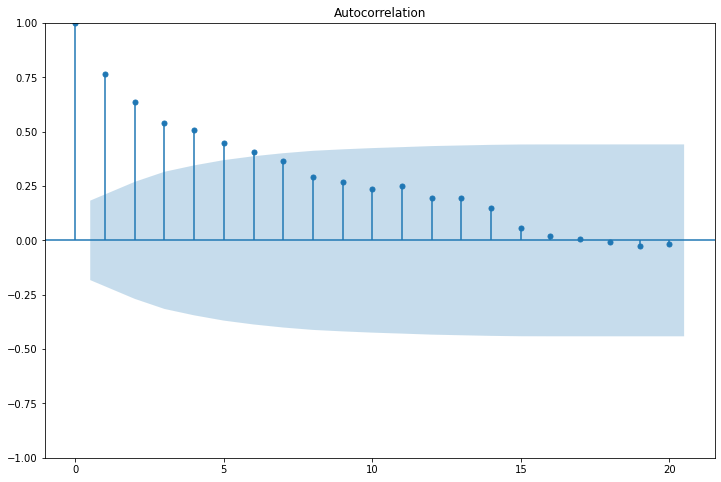

In [41]:
acf_plot = plot_acf( store_df.demand,lags=20 )

the slow decline of auto-correlations for different lags indicates that the series
is not stationary.

### Dicky−Fuller Test

To find out if a time series is stationary, Dickey−Fuller (Dickey and Fuller, 1979) test can also be con-
ducted. Dickey–Fuller test checks whether the b in Eq. (8.5) is equal to 1 or less than equal to 1. It is a
hypothesis test in which the null hypothesis and alternative hypothesis are given by
H0: b = 1 (the time series is non-stationary)
HA: b < 1 (the time series is stationary)
statsmodels.tsa.stattools.adfuller is a Dicky−Fuller test and returns test statistics and p-value for the test
of the null hypothesis. If the p-value is less than 0.05, the time series is stationary.

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(adfuller_out)
    adfuller_test(store_df.demand)    
    

In [44]:
# adfuller_test(store_df.demand)

The p-value (>0.05) indicates that we cannot reject the null hypothesis and hence, the series is not
stationary.
Differencing the original time series is an usual approach for converting the non-stationary process
into a stationary process (called difference stationarity). For example, the first difference (d = 1) is the
difference between consecutive values of the time series (Yt). That is, the first difference is given by

## Differencing

First difference between consecutive Yt values can be computed by subtracting the previous day’s demand
from that day’s demand. We can use shift() function in Pandas to shift the values before subtracting

In [45]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)
store_df.head()


,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [46]:
store_diff_df = store_df.dropna()
store_df.head()

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


Let us plot the first-order difference values

plt.figure(figsize=(10,4))
plt.xlabel(“Date”)
plt.ylabel(“First Order Differences”)
plt.plot( store_diff_df.demand_diff);

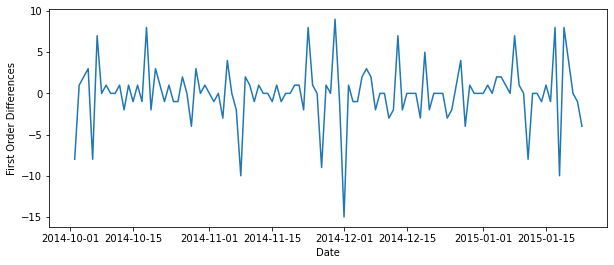

In [47]:
plt.figure(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('First Order Differences')
plt.plot( store_diff_df.demand_diff);

indicates the trend of first-order of differences for demand over dates. Again, it is not very
apparent from the trend if the series is stationary or not. We will need to plot the ACF plot to verify

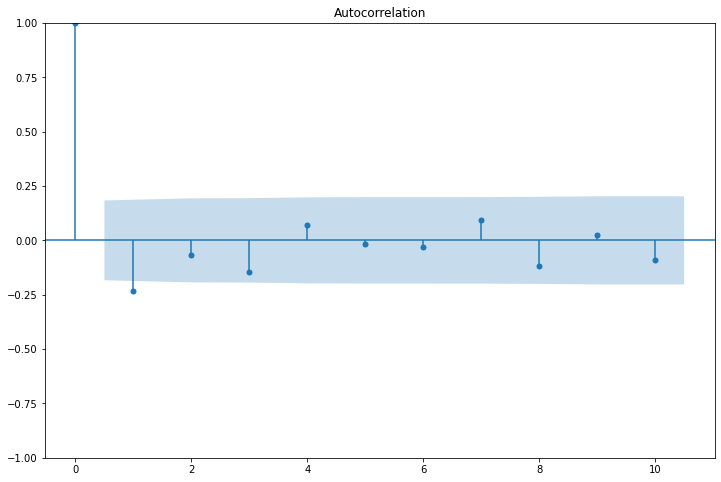

In [48]:
pacf_plot = plot_acf(store_df.demand_diff.dropna(),lags=10)

The ACF plot in Figure 8.10 shows no sign of slow reduction in autocorrelation over lags. It immediately
cuts off to zero. We can build the model with first 100 observations as training set and subsequent obser-
vations as test set.

In [49]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [51]:
arima = sm.tsa.arima.ARIMA(store_train.demand, order=(1,1,1))
arma_model = arima.fit()
arma_model.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -256.910
Date:                Sat, 01 Apr 2023   AIC                            519.821
Time:                        18:41:33   BIC                            527.606
Sample:                    10-01-2014   HQIC                           522.971
                         - 01-08-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4091      0.311      1.315      0.189      -0.201       1.019
ma.L1         -0.7179      0.236     -3.039      0.002      -1.181      -0.255
sigma2        10.4865      1.026     10.223      0.000       8.476      12.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                75.18
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA model is a regression model and thus has to satisfy all the assumptions of regression. The residuals
should be white noise and not correlated. This can be observed by using ACF and PACF plots of the
residuals. The model residuals are given by arima_model.resid variable.

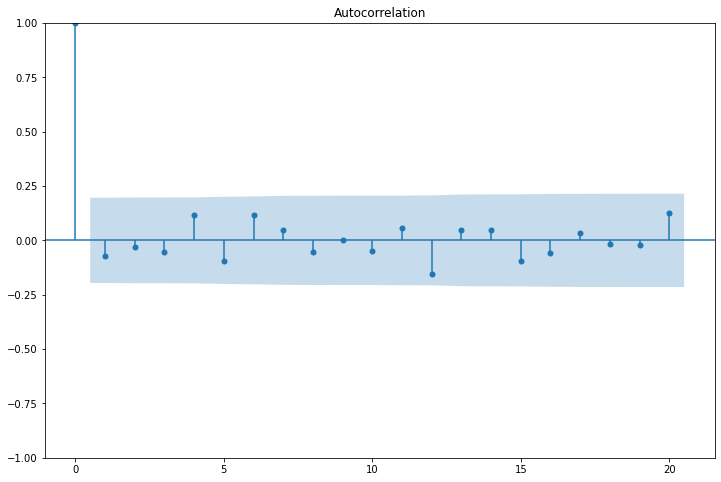

In [53]:
acf_plot = plot_acf(arma_model.resid,lags = 20)

### Forecast and Measure Accuracy

The forecast() method takes the number of future periods (steps) for predicting values and returns the
predicted values along with standard error and confidence interval of the predictions.

In [59]:
store_predict = arma_model.forecast(steps = 15)
store_predict

2015-01-09   17.25
2015-01-10   16.13
2015-01-11   15.67
2015-01-12   15.48
2015-01-13   15.40
2015-01-14   15.37
2015-01-15   15.36
2015-01-16   15.35
2015-01-17   15.35
2015-01-18   15.35
2015-01-19   15.35
2015-01-20   15.35
2015-01-21   15.35
2015-01-22   15.35
2015-01-23   15.35
Freq: D, Name: predicted_mean, dtype: float64

In [60]:
get_mape(store_df.demand[100:],store_predict)

24.12

# conclusion

1. Forecasting is carried out on a time-series data in which the dependent variable Yt is observed at different time periods t.

2. Several techniques such as moving average, exponential smoothing, and auto-regressive models are used for forecasting future value of Yt.

3. The forecasting models are validated using accuracy measures such as RMSE and MAPE.

4. Auto-regressive (AR) models are regression-based models in which dependent variable is Yt and the independent variables are Yt−1, Yt−2, etc.

5. AR models can be used only when the data is stationary.

6. Moving average (MA) models are regression models in which the independent variables are past error values.

7. Auto-regressive integrated moving average (ARIMA) has three components:

a. Auto-regressive component with p lags − AR(p)
b. Moving average component with q lags − MA(q)
c. Integration which is differencing the original data to make it stationary (denoted by d ).

8. One of the necessary conditions of acceptance of ARIMA model is that the residuals should follow white noise.

9. In ARIMA, the model identification, that is, identifying the value of p in AR and q in MA, is achieved through auto-correlation function (ACF) and partial auto-correlation function (PACF).

10. The stationarity of time-series data can be checked using the Dickey−Fuller test.